In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


### Introduction

In the following document we will review various experimental and theoretical studies performed in the field of sensory systems neuroscience that focus on how populations of neurons encode signals about the environment. At present it is unclear what are the basic principles of how neuronal populations encode sensory information. For example, it is not known what sort of coding schemes neuronal populations might use. It is also not known whether the encoding framework, which, historically, stems largely from the field of Information Theory, is even the most fruitful way of trying to understand how neurons mediate the relationship between an organism's environment and the organism's behavior.

In light of these difficulties, a large body of work has focused on determining the theoretical limits on information processing capacity in variously organized networks. This work has often, though likely not often enough, been constrained by certain results from the empirical literature in sensory systems neuroscience. As much of this literature in the 1990's through the present day (2015) have focused on how neuronal variability, and specifically covariability, might impact coding accuracy, this topic will also be our focus here. 

In this document we will review the basic theoretical findings from a number of articles published in the field. To aid our understanding of these findings we will work through simulations of the described work to reproduce the main findings in the relevant articles. Frequently, however, we will digress a bit to dig deeper into some of the background to this theoretical work which is often not able to be covered in sufficient detail in the primary articles themselves.

### Some Basic Terms

**Population Coding** 

Refers to the idea that, from a behavioral standpoint, the most directly relevant "operational unit" of the brain is a group, or population, of neurons. That is, a single neocortical cell's firing only very rarely leads to any behaviorally relevant difference or outcome, and most of the time, many neurons acting in concert are required to generate behavior. Population coding, specifically, refers to the idea that certain patterns of activity in a population are more meaningful towards generating behavior than others. Deciphering these patterns is equivalent to deciphering the population code.


**Discrimination** 

Is a type of behavior that relies heavily of perceptual information and that is frequently studied in the field of sensory systems neuroscience. *Discrimination tasks* are one of the mainstays of perceptual and sensory systems neuroscience, as one can record directly from individual or populations of neurons directly involved in generating the perceptions and subsequently the behaviors involved in successful performance of such tasks. In a discrimination task, the subject must typically decide, or discriminate, between possible alternative interpretations of sensory stimulus, for example, discriminating a leftward or rightward motion of an object or a change in orientation of another object.

In addition to enabling the study of the activity of neurons directly involved in perception and behavior, much theoretical work has been carried out through the years pertaining to discrimination and the theoretical limits a system can or cannot achieve under different circumstances regarding its ability to discriminate between stimuli.


**Noise Correlations or Correlated Variability**

Refers to correlations between pairs of neurons in the fluctuations they exhibit around their mean responses to repeated presentations of a stimulus.

As noise correlations will be a central focus in much of the work we discuss here, I will demonstrate what they are and how they are computed with a simple simulation. In the following, we use a bivariate normal distribution to generate two vectors of random numbers which will correspond to spike counts across trials of two neurons. The *spike count* is the currency of neuronal variability in the coding literature and is calculated simply by counting the number of action potentials the neuron fires in a particular time interval following stimulus onset. We generate two spike trains below:

In [4]:
mu = [10, 12]
sig = [[2, 1],[1, 3]]
nTrials = 100
neu = rint(random.multivariate_normal(mu, sig, nTrials))
neu # the result here is two vectors of length nTrials where each element is an integer 

array([[ 10.,  13.],
       [ 10.,  14.],
       [ 12.,  13.],
       [  8.,  14.],
       [ 10.,  13.],
       [ 10.,  12.],
       [  8.,  11.],
       [ 11.,  14.],
       [ 10.,  11.],
       [  9.,  14.],
       [ 11.,  13.],
       [ 12.,  11.],
       [ 11.,  13.],
       [  8.,  14.],
       [ 11.,  10.],
       [ 10.,  16.],
       [  9.,  12.],
       [  9.,  12.],
       [ 12.,  14.],
       [ 10.,  12.],
       [  8.,  13.],
       [ 12.,  15.],
       [ 10.,  12.],
       [ 10.,   9.],
       [  9.,  13.],
       [  8.,  12.],
       [ 13.,  15.],
       [  9.,   9.],
       [  8.,  11.],
       [ 10.,  12.],
       [  7.,   8.],
       [ 11.,  15.],
       [ 11.,  12.],
       [ 11.,  16.],
       [ 10.,  13.],
       [  8.,  12.],
       [  8.,   8.],
       [  8.,  10.],
       [ 12.,  12.],
       [  9.,  15.],
       [  9.,  11.],
       [ 11.,  13.],
       [ 11.,  17.],
       [ 10.,  10.],
       [  7.,  10.],
       [  8.,  11.],
       [  9.,  11.],
       [ 13.,

In [5]:
def getZed(sc):
    sc = array(sc)
    mu = mean(sc)
    sig = std(sc)
    zedScore = (sc - mu) / sig
    return zedScore

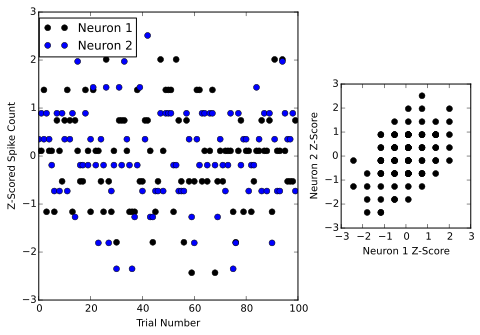

In [6]:
z1 = getZed(neu[:,0])
z2 = getZed(neu[:,1])

axes([0,0,.6,1])
plot(z1, 'ok', label='Neuron 1')
plot(z2, 'ob', label='Neuron 2')
xlabel('Trial Number')
ylabel('Z-Scored Spike Count')
legend(bbox_to_anchor=(.4, 1))


axes([.7,.25,.3,.5])
plot(z1, z2, 'ok')
xlabel('Neuron 1 Z-Score')
ylabel('Neuron 2 Z-Score')

Above we plot the z-scored spike counts of our neuronal pair in two different forms. On the left is a plot showing the Z-Score across time, or trials, while on the right we plot the z-scores relative to each other. This latter plot makes it easier to visualize whether the cells are correlated or not. Here we see that as cell 1 increases its spike coint, cell 2 has a tendency to do similarly, meaning they are correlated. 

To quantify this relationship we take the Pearson's correlation coefficient of the z-scored spike counts.

$$
\rho = \frac{Cov(X,Y)}{\sigma_x\sigma_y}
$$

Here, $X = Z_1$ and $Y = Z_2$, and as we are working with z-scores, $E[Z] = 0$ and $\sigma_Z = 1$, giving:

\begin{align}
\rho &= \frac{Cov(Z_1,Z_2)}{\sigma_{Z_1}\sigma_{Z_2}} \\
&= \frac{E[Z_1Z_2] - E[Z_1]E[Z_2]}{\sigma_{Z_1}\sigma_{Z_2}} \\
&= E[Z_1Z_2] \\
\end{align}

In [80]:
Ezz = mean(z1*z2) # z1 * z2 gives is the elementwise product of z1 and z2 rather than a dot-product of two vectors
rho = corrcoef(z1,z2)
rho


array([[ 1.        ,  0.28215868],
       [ 0.28215868,  1.        ]])

In [81]:
Ezz

0.28215868226898283

Thus, our pair of neurons are quite strongly noise correlated (as we would expect given how we simulated the spike trains).

With these preliminaries out of the way, let's focus on our first paper.

 ###Correlated neuronal discharge rate and its implications for psychophysical performance. 
 *Zohary et al. (1994) Nature*

In this article, the authors measure levels of correlated variability between pairs of neurons while subjects perform a discrimination task and then assess theoretically how these correlations impact population coding in a simple neuronal model where responses are pooled. 

Prior work demonstrated that neuronal sensitivity in discrimination tasks is often near, and sometimes exceeds, behavioral sensitivity (see Britten et al. (1992) The analysis of visual motion. JNeuro), raising the question: why is behavioral performance not greater than that of individual neurons? This issue is particularly striking given that it is thought that populations, rather than single neurons, guide behavior. Thus, if we have a population of highly sensitive neurons and behavior is generated through their joint activity, pooling (averaging, eg) the responses of all of these cells together should provide an even more accurate representation and higher sensitivity. However, we don't see a level of behavioral performance that matches this expected degree of neuronal sensitivity.

This study offers a potential answer to the conundrum: we don't see such high levels of performance because neurons are noise correlated, and such correlations diminish the benefit of pooling responses across groups of neurons.

To study the impact that correlations have on pooling responses together, the authors studied how the SNR (signal-to-noise) ratio is affected by correlation. If we have a population of $M$ neurons whose firing rates are identically distributed and given by $X_i$, the SNR of the summed signals, in this case, is given by:

\begin{align}
SNR &= \frac{\mu}{\sigma_\Sigma} \\
&= \frac{\langle\sum_{i=1}^{M}X_i\rangle}{\langle\sigma_\Sigma\rangle} \\
&= \frac{M \langle X_i\rangle}{\sqrt{M\sigma_\Sigma^2 + M(M-1)r\sigma_\Sigma^2}}
\end{align}

Below, we plot the SNR as a function of population size for different values of R, reproducing Fig3A from Zohary et al. (1994).

In [7]:
def sigToNoise(M,mu,sig,r):
    SNR = (M*mu) / sqrt(M*pow(sig,2) + (M*(M-1)*r*pow(sig,2)))
    return SNR

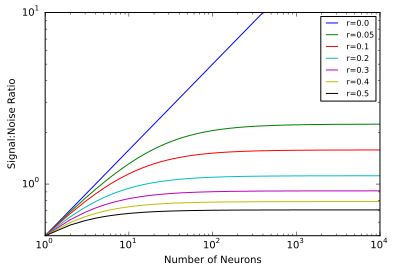

In [8]:
M = array(linspace(1,10000,10000))
mu = .1
sig = .2
rho = array([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5])

fig = Figure()
for r in rho:
    SNR = sigToNoise(M, mu, sig, r)
    labStr = "r={0}".format(r)
    plot(M, SNR, label=labStr)
legend(prop={'size':8})
xscale('log')
yscale('log')
ylim([0, 10])    
xlabel('Number of Neurons')
ylabel('Signal:Noise Ratio')

Thus, we can see with a theoretical analysis of a neuronal pooling model that, with any degree of correlation greater than zero, we get a saturation in the signal to noise level of the pooled responses. This means that in the presence of correlations there is no benefit to listening to a larger group of neurons after a certain, and quite low considering how many neurons are in a small volume of cortex, point.

The finding reviewed above is certainly not the only important result from this paper, but this result serves as a good introduction to what has become the central issue in the field: how do correlations between pairs of neurons impact coding? Is the signal always limited by such correlations?

To continute our discussion of this issue, we will turn our attention to a paper by Sompolinksy et al. which begins exactly where the above conversation leaves off, with a simple pooling model.

### Population coding in neuronal systems with correlated noise
*Sompolinsky et al (2001)*

The primary focus of this paper is to undertake an analysis of a pool of neurons encoding a particular stimulus parameter, for example, angle or orientation of the stimulus. The first model discussed in the paper focuses on linear discrimination in a population of uniformly correlated neurons, while the second focuses on estimation of an angular variable from a population of neurons that exhibit a particular pattern of correlations, called limited-range correlations, which differs from the uniform case examined thus far. I will elaborate on this pattern of correlations as our discussion reaches the topic. For now, let us focus on linear discrimination in a population of uniformly correlated neurons. We will first briefly introduce the model and the goal of the task, and in our discussion of the topic, we will provide a more thorough treatment of the topic of discrimination as well.

In our model we assume there are two stimuli and our population of $N$ neurons have mean firing rates $f_i^+$ for one stimulus and $f_i^-$ for the other.

The probability of the joint response **r** follows a Gaussian distribution given either stimulus. Using the + stimulus for example:

$$
p(\mathbf{r}|+) = Z^{-1}\exp{\left(-\frac{1}{2}\sum_{i,j}(r_i-f_i^+)C^{-1}(r_j-f_j^+)\right)}
$$

For our discrimination task, we put ourselves in the place of a downstream neuron whose job is to listen to our sensory neurons and determine whether the stimulus is a + or a - type. Discriminating between these stimuli amounts to essentially a categorization or classification task, where we must determine which category or class the stimulus belongs to, with our classes being + or - in this case. Discrimination is different from estimating the value of a parameter of the stimulus presented, for example the orientation of the stimulus, as no precise estimation of specific parameter values is needed for correct discrimination to occur. In both cases, however, our currency is firing rates. We have knowledge of how many action potentials each cell fires in response to the stimulus shown and we must combine those firing rates in some manner to come to our conclusion (reflecting a prominent hypothesis in the field that the brain does something similarly).

We are further constrained to performing linear discrimination, so this means that we are restricted in the ways we can combine our set of firing rates, denoted by the bold **r** and referred to above as the joint response. Specifically we can multiply each rate by a number or add another number to it, but that is all. Ultimately we want to combine them in a way that makes their class membership clear.



We are working with the following readout rule as specified in the paper:

$$
L_w(\mathbf{r}) = \sum_iw_ir_i = \mathbf{w}^T\mathbf{r}
$$

Now, we saw above that the joint response **r** follows a Gaussian distribution given a particular stimulus value. As there are two stimuli, the full distribution of firing rates is a mixture of Gaussian distributions (one for each stimulus value). With a population of more than 2 neurons, this mixture becomes rather difficult to visualize. However, linear functions of Gaussian distributed variables produce Gaussian distributed outcomes, and since our readout rule is a linear function of Gaussian distributed variables, the result is Gaussian as well. More specifically, it represents a mixture of Gaussians (one for each stimulus), but this mixture distribution is easy to visualize because it is one-dimensional rather than N-dimensional (as is the case for our original joint response distribution). In linear algebra, left-multiplying a matrix by a lower-dimensional (also called, lower-rank) matrix is called projection. In this case we are projecting our firing rate vector onto our weight vector, and we get a scalar, and therefore one-dimensional, result.